# Epidemic SIR model


## Mean Field approximation
In the [Mean Field notebook](./mean_field.ipynb) we presented the general evolution equation for each state and node degree:
$$\frac{d}{dt}x^i_k = - \sum_{j \neq i}x^i_k\sum_{|m|=k}Mult(m)F_m(i\rightarrow j) + 
\sum_{j\neq i}x^j_k\sum_{|m|=k}Mult(m)F_m(j\rightarrow i)$$

For the purposes of the SIR model we slighlty change the notation. The SIR model is a dynamical process with 3 states (`n=3`), where `S` is susceptible, `I` is infected and `R` stads for recovered or removed. Mind that `i=S` is `i=0` e.g. $x^S_k$ stands for $x^0_k$, respectively for `I` and `R`.

For SIR model we usually consider following transitions $S \rightarrow I \rightarrow R$, where the rates are by convetion parameters $\beta$ and $\gamma$. Therefore, the transition rate matrix for the SIR model is:

$\begin{align}
F_{\mathbf{m}} = \begin{bmatrix}
0 & \beta m_S & 0\\
0 & 0 & \gamma \\
0 & 0 & 0
\end{bmatrix}
\end{align}$

Putting the $F_{\mathbf{m}}$ into the general evolution equation we will get 3 classes of equation for each node degree k.

$\begin{align}
\frac{d}{dt} x^S_k = - \beta x^S_k \sum_{|\mathbf{m}|=k}Mult(\mathbf{m}) m_S
\end{align}$  
$\begin{align}
\frac{d}{dt} x^I_k = - \gamma x^I_k \sum_{|\mathbf{m}|=k}Mult(\mathbf{m}) + \beta x^S_k \sum_{|\mathbf{m}|=k}Mult(\mathbf{m}) m_S
\end{align}$  
$\begin{align}
\frac{d}{dt} x^R_k =  \gamma x^I_k \sum_{|\mathbf{m}|=k}Mult(\mathbf{m}) 
\end{align}$

## Example
Consider a SIR model with parameters $\beta = 0.02$ and $\gamma = 0.02$. Having network generated by Barabasi-Albert model with size `N=100` with 2 new edges leading from newly added nodes. Initial number of infected nodes is 2 and one recovered node.

In this example, we will provide a 10 independent realisation of the SIR model and calculation of the Mean Field approximation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from network.models.barabasi_albert import BarabasiAlbert
from multistate_processes import MultistateProcess, SimulateProcess, MeanField

In [2]:
N = 100
n = 3
num_infected = 2 
T = 250

network = BarabasiAlbert(N, 2)

rate_matrix = np.array([
    ['0', 'beta*{1}', '0'], 
    ['0', '0', 'gamma'], 
    ['0', '0', '0']
])

sir_process = MultistateProcess(rate_matrix, gamma=0.02, beta=0.02)

states = [0] * N
random_nodes = np.random.choice(list(range(N)), num_infected + 1).tolist()

for i in random_nodes[:-1]:
    states[i] = 1

states[random_nodes[-1]] = 2

X = np.zeros((T, n, int(network.k_max)))
S = np.zeros((T, n))

degrees = network.degrees_list
for node in range(N):
    X[0][states[node]][degrees[node] - 1] += 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


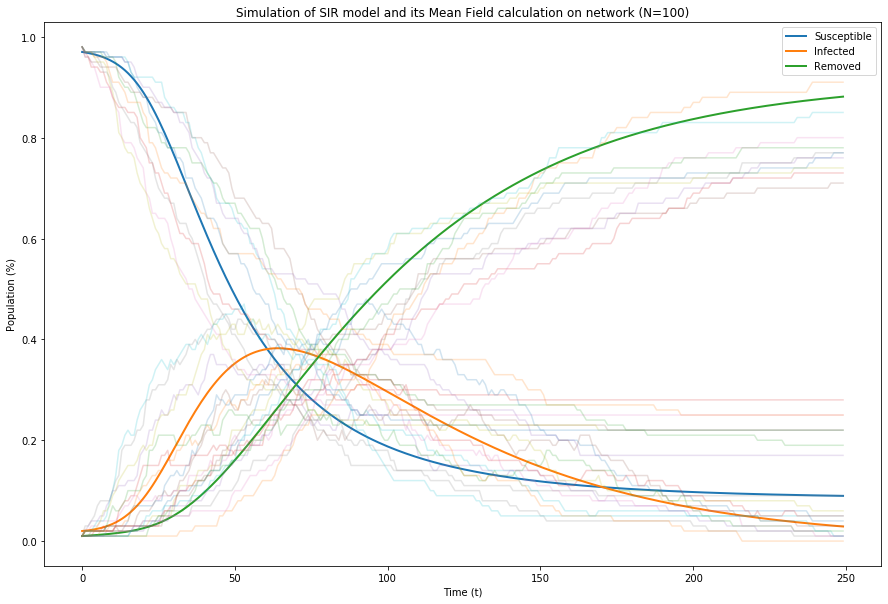

In [3]:
X = np.nan_to_num(X / np.sum(X[0], axis=0))
S[0] = np.array([N - num_infected, num_infected - 1, 1])

mean_field = MeanField(network, sir_process, T, X)

calculate_mean_field = iter(mean_field)
plt.figure(figsize=(15, 10))
for t in range(1, T):
    next(calculate_mean_field)

plt.plot(np.arange(T), mean_field.rho(calculate_mean_field.x), linewidth=2)

for i in range(10):
    sir = SimulateProcess(network, sir_process, T, states)
    simulate_sir = iter(sir)
    for t in range(1, T):
        s = next(simulate_sir)
        S[t] = np.histogram(s, bins=list(range(n + 1)))[0]
    
    plt.plot(np.arange(T), S / N, alpha=0.2)

plt.ylabel('Population (%)')
plt.xlabel('Time (t)')
plt.title(f'Simulation of SIR model and its Mean Field calculation on network (N={N})')
plt.legend(['Susceptible', 'Infected', 'Removed'])
plt.show()

## Conclusion
In this notebook we presented a general framework for Mean Field approximation with 3 different classes of evolution eqation for a SIR model with parameters $\beta$ and $\gamma$. In order to demonstrate the Mean Field calculation (bold solid lines on the plot) we did 10 independent simulations (tiny lines in the background) with the same parameters. 

## References
[1] Peter G. Fennell, James P. Gleeson, Multistate dynamical processes on networks: Analysis through degree-based 
approximation frameworks, [arXiv:1709.09969](https://arxiv.org/abs/1709.09969) [physics.soc-ph]

[2] Newman, M. E. J. (2010), Networks: an introduction, Oxford University Press, Oxford; New York